# Clustering Assignment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# dataset
Airline = pd.read_excel('wine.xlsx', sheet_name='data')

Airline

FileNotFoundError: [Errno 2] No such file or directory: 'wine.xlsx'

In [2]:
Airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [3]:
Airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [4]:
Airline.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

it seems there are no null or missing values

In [5]:
Airline.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
# Scaling the data- 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Airline_scale = scaler.fit_transform(Airline)

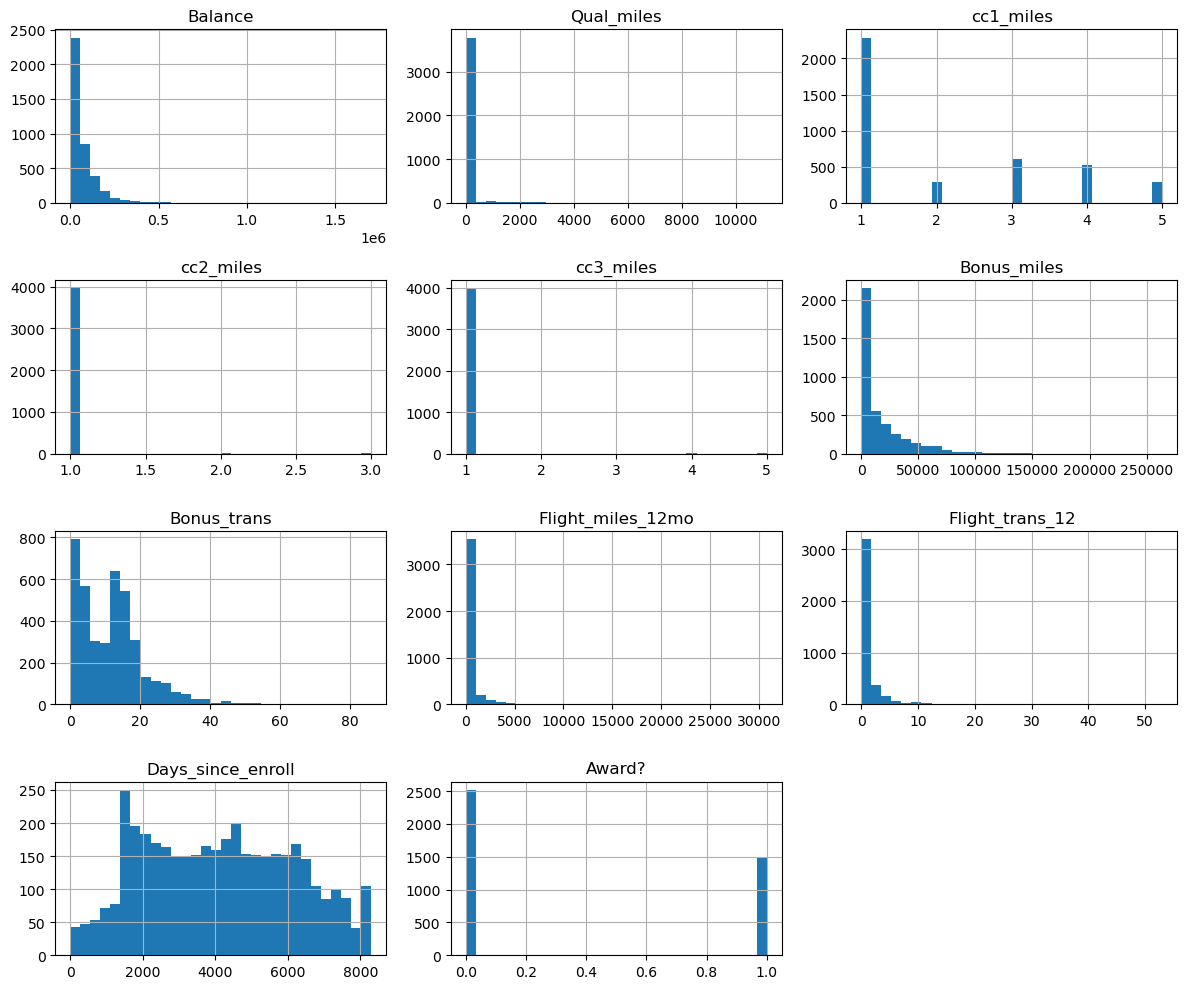

In [7]:
# Visualizing
Airline.hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()

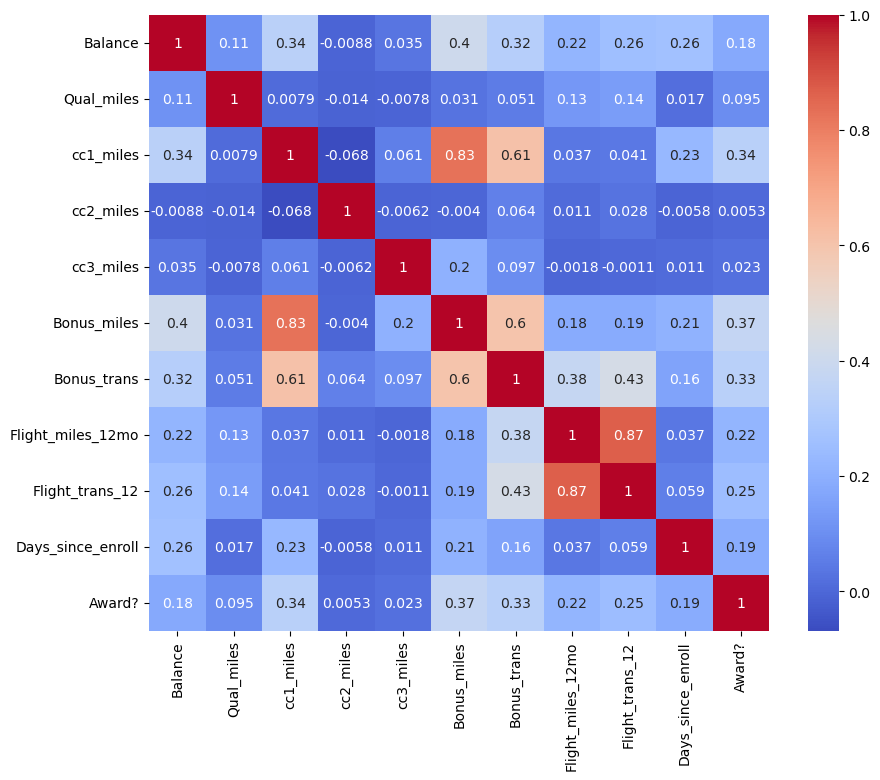

In [8]:
# Correlation 
plt.figure(figsize=(10, 8))
sns.heatmap(Airline.corr(), annot=True, cmap='coolwarm')
plt.show()

Red squares indicate positive correlations.
Blue squares indicate negative correlations

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(Airline_scale)

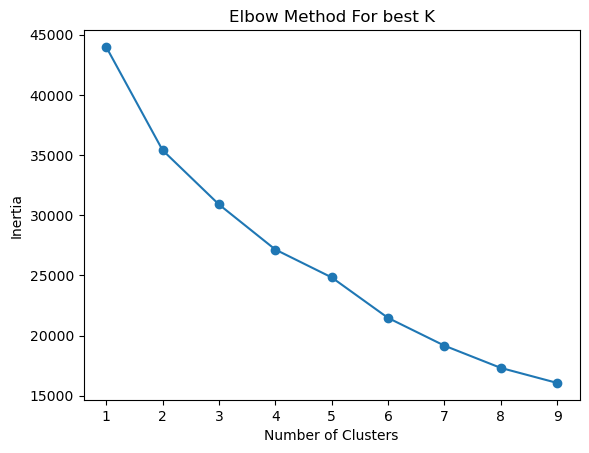

In [19]:
# kmeans elbow method - it is the wwaay to choose best number of clusters in k means
inertia = [] 
K = range(1, 10)
for k in K:
    kM = KMeans(n_clusters=k, random_state=40, n_init=10)
    kM.fit(Airline_scale)
    inertia.append(kM.inertia_)

plt.figure()
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method For best K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()
kmeans = KMeans(n_clusters=3, random_state=40, n_init=10)
kmeans_labels = kmeans.fit_predict(Airline_scale)
Airline['KMeans_Cluster'] = kmeans_labels

In [11]:
print("KMeans Silhouette Score:", silhouette_score(Airline_scale, kmeans_labels))

KMeans Silhouette Score: 0.3121716765282414


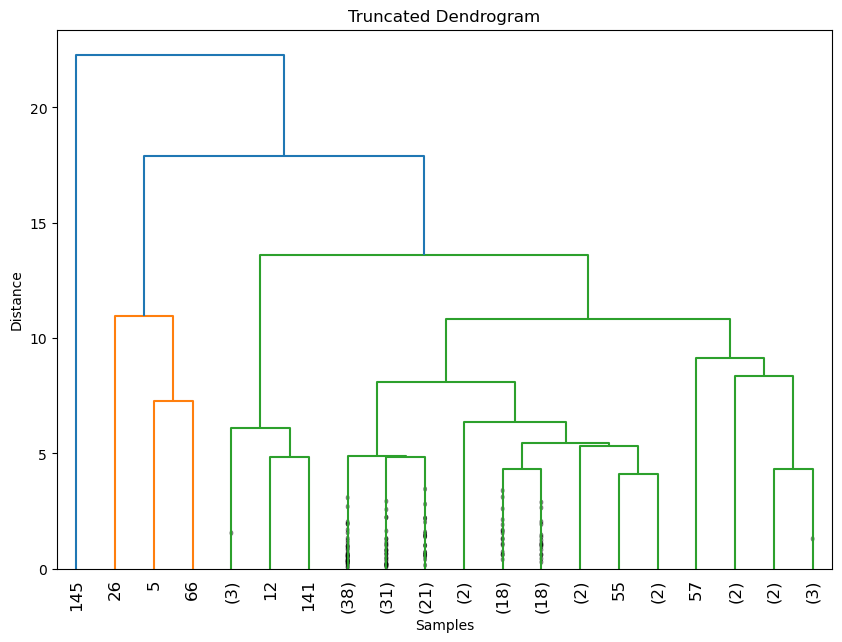

In [12]:
import numpy as np
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt

sample_size = 150
np.random.seed(40)  

if Airline_scale.shape[0] > sample_size:
    sample_indices = np.random.choice(range(Airline_scale.shape[0]), size=sample_size, replace=False)
    data_for_dendrogram = Airline_scale[sample_indices]
else:
    data_for_dendrogram = Airline_scale

plt.figure(figsize=(10,7))
# i have used complete method 
linkage_matrix = shc.linkage(data_for_dendrogram, method='complete')

dendrogram = shc.dendrogram(
    linkage_matrix,
    truncate_mode='lastp', # to shorten it for simplier visualiztion
    p=20,
    leaf_rotation=90,
    leaf_font_size=12,
    show_contracted=True
)
plt.title("Truncated Dendrogram")
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

full_linkage = shc.linkage(Airline_scale, method='complete')
clusters = fcluster(full_linkage, 25, criterion='distance')
Airline['Cluster'] = clusters


In [13]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, linkage='complete')
hc_labels = hc.fit_predict(Airline_scale)
Airline['Hierarchical_Cluster'] = hc_labels
print("Hierarchical Silhouette Score:", silhouette_score(Airline_scale, hc_labels))

Hierarchical Silhouette Score: 0.7760836053602842


In [14]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
db_labels = dbscan.fit_predict(Airline_scale)
Airline['DBSCAN_Cluster'] = db_labels
filtered_labels = db_labels[db_labels != -1]
filtered_features = Airline_scale[db_labels != -1]
if len(set(filtered_labels)) > 1:
    print("DBSCAN Silhouette Score:", silhouette_score(filtered_features, filtered_labels))
else:
    print("DBSCAN did not form sufficient clusters.")

DBSCAN Silhouette Score: 0.29403795451062353


In [15]:
## Hierarchical Silhouette Score: 0.776  is doing a good job in grouping compared to kmeans and dbscan

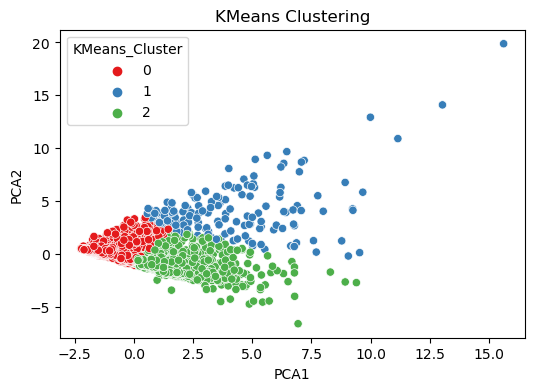

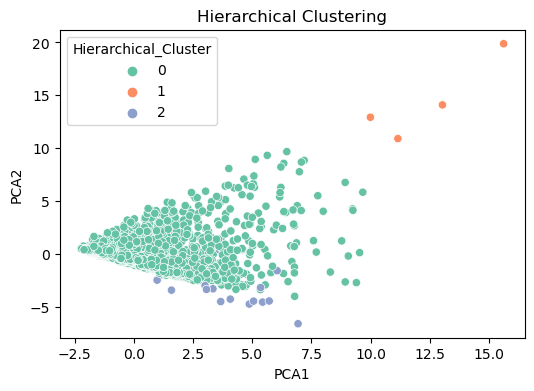

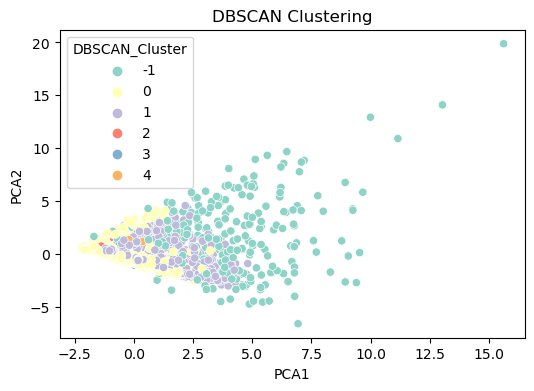

In [16]:
# kmeans plot
Airline['PCA1'] = X_pca[:, 0]
Airline['PCA2'] = X_pca[:, 1]
plt.figure(figsize=(6, 4))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=Airline, palette='Set1')
plt.title('KMeans Clustering')
plt.show()

# Hierarchical Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='PCA1', y='PCA2', hue='Hierarchical_Cluster', data=Airline, palette='Set2')
plt.title('Hierarchical Clustering')
plt.show()

# DBSCAN Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN_Cluster', data=Airline, palette='Set3')
plt.title('DBSCAN Clustering')
plt.show()

In [17]:
features = Airline.select_dtypes(include=[np.number])
print("\nKMeans Cluster Description:")
print(Airline.groupby('KMeans_Cluster')[features.columns].mean())

print("\nHierarchical Cluster Description:")
print(Airline.groupby('Hierarchical_Cluster')[features.columns].mean())

print("\nDBSCAN Cluster Description (excluding noise):")
if -1 in Airline['DBSCAN_Cluster'].unique():
    print(Airline[Airline['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster')[features.columns].mean())
else:
    print(Airline.groupby('DBSCAN_Cluster')[features.columns].mean())


KMeans Cluster Description:
                      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
KMeans_Cluster                                                               
0                44370.730307   96.720605   1.237097   1.019014   1.000388   
1               195200.231707  783.207317   2.152439   1.036585   1.000000   
2               117627.582671  157.884738   3.732114   1.002385   1.038156   

                 Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
KMeans_Cluster                                                                  
0                4837.902212     7.015134         200.463718         0.625534   
1               31379.963415    26.993902        5412.000000        15.798780   
2               40499.723370    18.991256         346.263911         1.025437   

                Days_since_enroll    Award?  KMeans_Cluster   Cluster  \
KMeans_Cluster                                                          
0                     3707.3

In [18]:
## k means good at grouping but moderate whereas Hierarchical is good at grouping and is better than k means and dbscan